In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Exercise 1:** [Combined cycle powerplant-dataset](https://www.kaggle.com/datasets/gova26/airpressure)





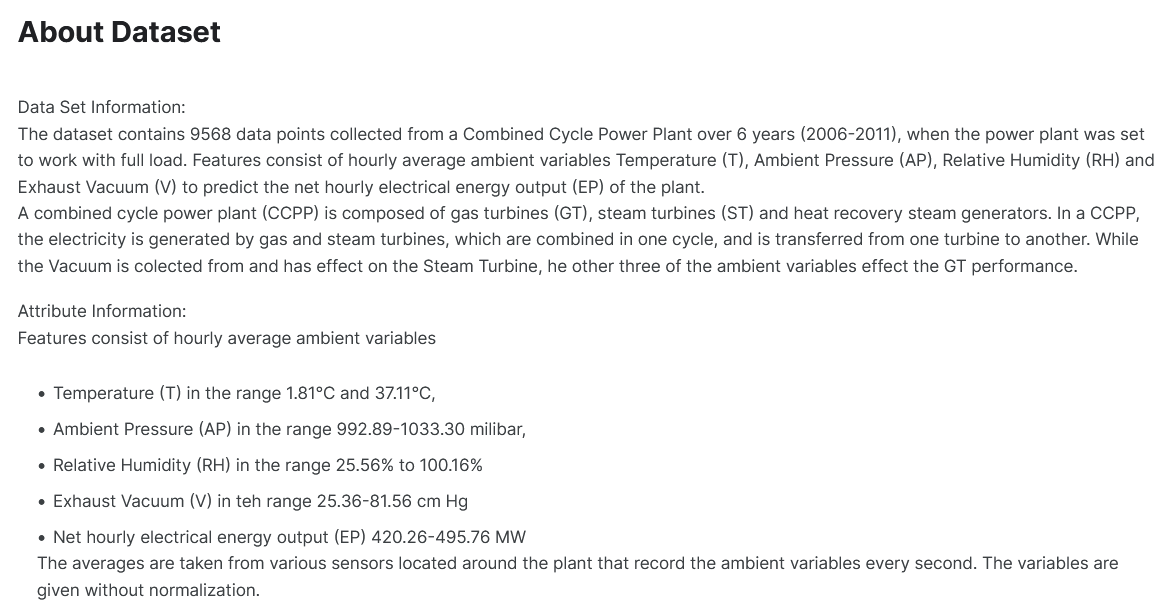

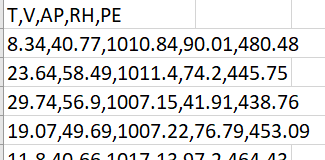

Load Folds5x2_pp.csv to Colab

In [5]:
#read the dataset into a matrix data
data=np.loadtxt('Folds5x2_pp.csv', delimiter=',', skiprows=1)
X=data[:,:4] #coodinates [x1,x2,x3,x4]=[T,V,AP,RH] as rows
y=data[:,4] #values of PE to be predicted

print(X[:5,:])
print(y[:5])

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 [  19.07   49.69 1007.22   76.79]
 [  11.8    40.66 1017.13   97.2 ]]
[480.48 445.75 438.76 453.09 464.43]


In [6]:
m,n=data.shape
print(m)
print(n)

9568
5


#### Draw histogram


and on the dependance of $y=PE$ on the coordinates $T,V,AP,RH$

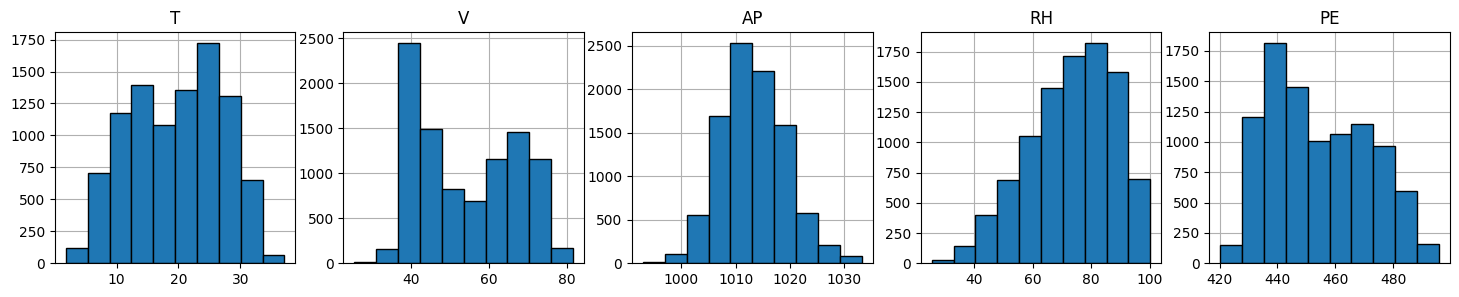

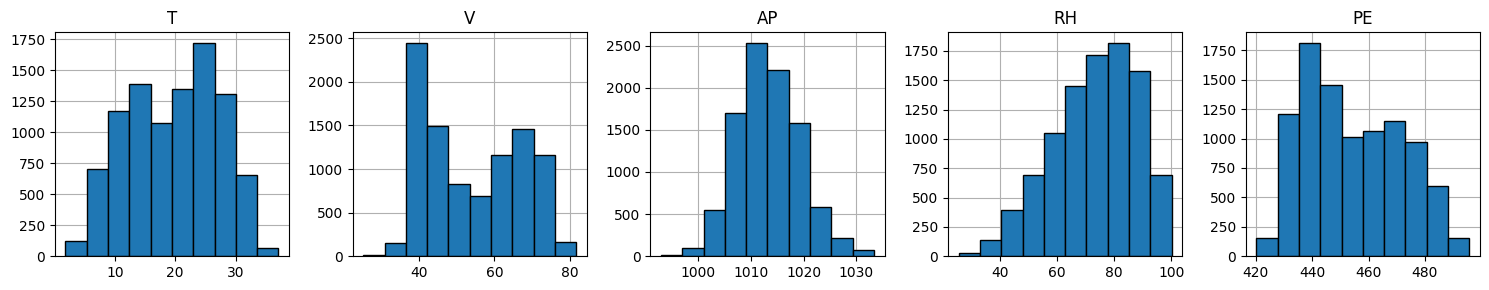

In [7]:
# Plot histograms
plt.figure(figsize=(15, 3))
chart_name = ["T", "V", "AP", "RH", "PE"]

for k in range(4):
    plt.subplot(1, 5, k + 1)
    plt.hist(X[:, k], bins=10, edgecolor='k', zorder=2)
    plt.grid()
    plt.title(chart_name[k])

# Plot PE separately
plt.subplot(1, 5, 5)
plt.hist(y, bins=10, edgecolor='k', zorder=2)
plt.grid()
plt.title(chart_name[4])

plt.tight_layout()
plt.show()

#### Draw dependency scatter plot



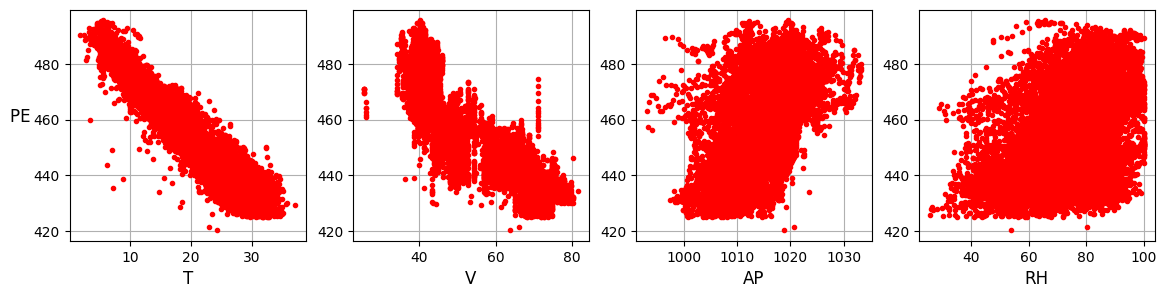

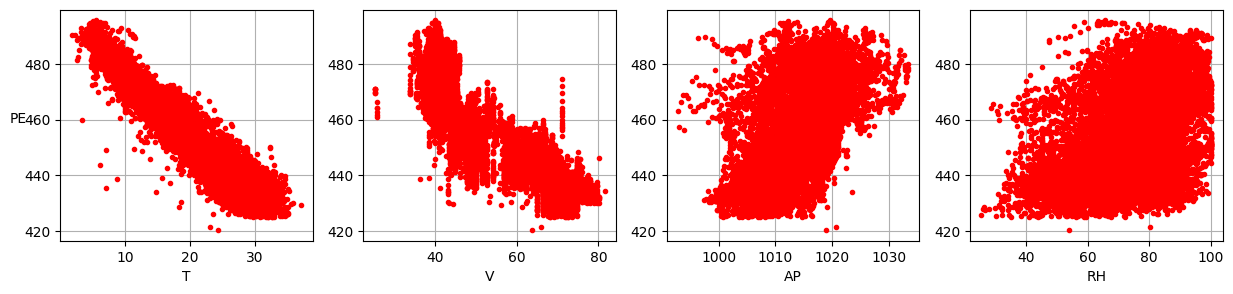

In [8]:
#dependency of PE of the variables T,V,AP,RH
plt.figure(figsize=(15,3))
for k in range(4):
  plt.subplot(1,4,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.grid()
  plt.xlabel(chart_name[k])
  if k==0:
    plt.ylabel('PE',rotation=0)

#### Draw regression line



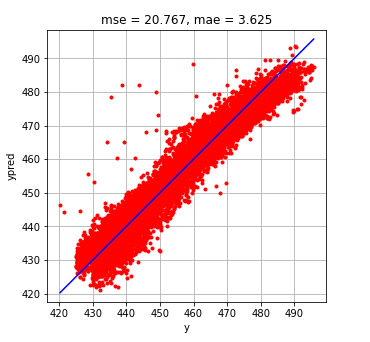

Calculate the predicted value for $y$, when
$x=[8,40,1050,95]$

(ans: 479.60)

In [9]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X,y)
w=model.coef_
b=model.intercept_

np.set_printoptions(precision=4,linewidth=300,suppress=True)
#suppress=True-> doesn't show e-forms of decimals i.e 5.0e-4 etc
print(w)
print(b)

[-1.9775 -0.2339  0.0621 -0.1581]
454.6092743153106


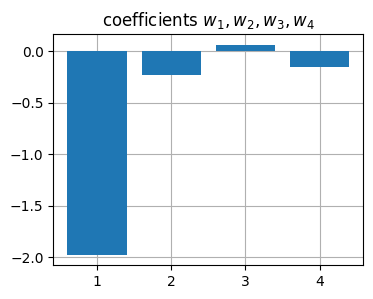

In [10]:
plt.figure(figsize=(4,3))
plt.bar(np.arange(1,5),w,zorder=2) #plot the w
plt.grid()
plt.xticks(np.arange(1,5))
plt.title('coefficients $w_1,w_2,w_3,w_4$')
plt.show()

In [11]:
#predicted values for y from the formula
ypred=np.sum(w*X,axis=1)+b

#minimum value of the cost
#mse=mean squared error
mse=1/m*np.sum((ypred-y)**2)
print(mse)
#mae=mean average error
mae=1/m*np.sum(np.abs(ypred-y))
print(mae)

20.767397532535018
3.6252158076011947


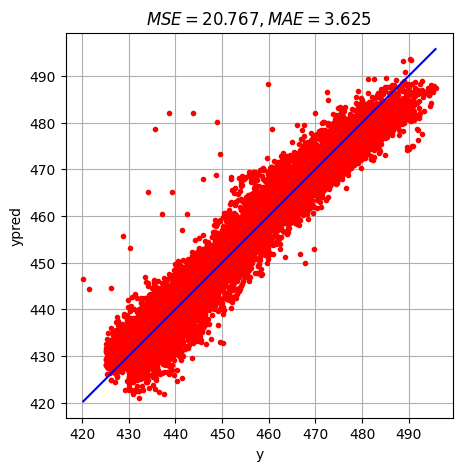

In [12]:
#given y vs. predicted y
ymin=np.min(y)
ymax=np.max(y)
plt.figure(figsize=(5,5))
plt.title(r'$MSE = {:.3f}, MAE = {:.3f}$'.format(mse, mae))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.show()

In [13]:
#test point
xt=np.array([8,40,1050,95])
#predicted y
yt=np.sum(w*xt)+b
print(yt)

479.60446375176747


#### Calculate X hat and test code

Find coefficients to a  formula  
$$
y=w_1\widehat{x}_1+w_2\widehat{x}_2+w_3\widehat{x}_3+w_4\widehat{x}_4+b
$$

using the scaled coordinates

$$
\widehat{x}_j=\frac{x_j-\mu_j}{\sigma_j},\quad j=1,2,3,4
$$



(ans: $w=[-14.737, -2.972,   0.369,  -2.308],\,b=
454.365$)


 and draw a picture like below

In [14]:
#scaled coordinates, means=0 and standard deviations=1
mu=np.mean(X,axis=0) #means of the coordinates of the datapoints, [mu1,mu2,mu3,mu4,mu5]
print(mu)
s=np.std(X,axis=0) #standard deviations of the coordinates, [s1,s2,s3,s4,s5]
print(s)
Xhat=(X-mu)/s #scaled coordinates, [(x1-mu1)/s1,(x2-mu2)/s2,(x3-mu3)/s3,(x4-mu4)/s4,(x5-mu5)/s5]

[  19.6512   54.3058 1013.2591   73.309 ]
[ 7.4521 12.7072  5.9385 14.5995]


In [15]:
print(np.mean(Xhat,axis=0))
print(np.std(Xhat,axis=0))

[-0. -0.  0.  0.]
[1. 1. 1. 1.]


In [16]:
#coefficients for the formula using the scaled coordinates
model_hat=LinearRegression().fit(Xhat,y)

what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)

[-14.7366  -2.9724   0.3687  -2.3075]
454.36500940635386


## **Exercise 2:**



Use the points $x^{(i)},y^{(i)}$ given below to find a formula

$$
y=w_1x^2+w_2x+b
$$

using linear regression for datapoints

$$
[x_1^{(i)},x_2^{(i)}],\,y^{(i)}
$$

where

$$x_1^{(i)}=(x^{(i)})^2,\,x_2^{(i)}=x^{(i)}$$

and draw pictures like below

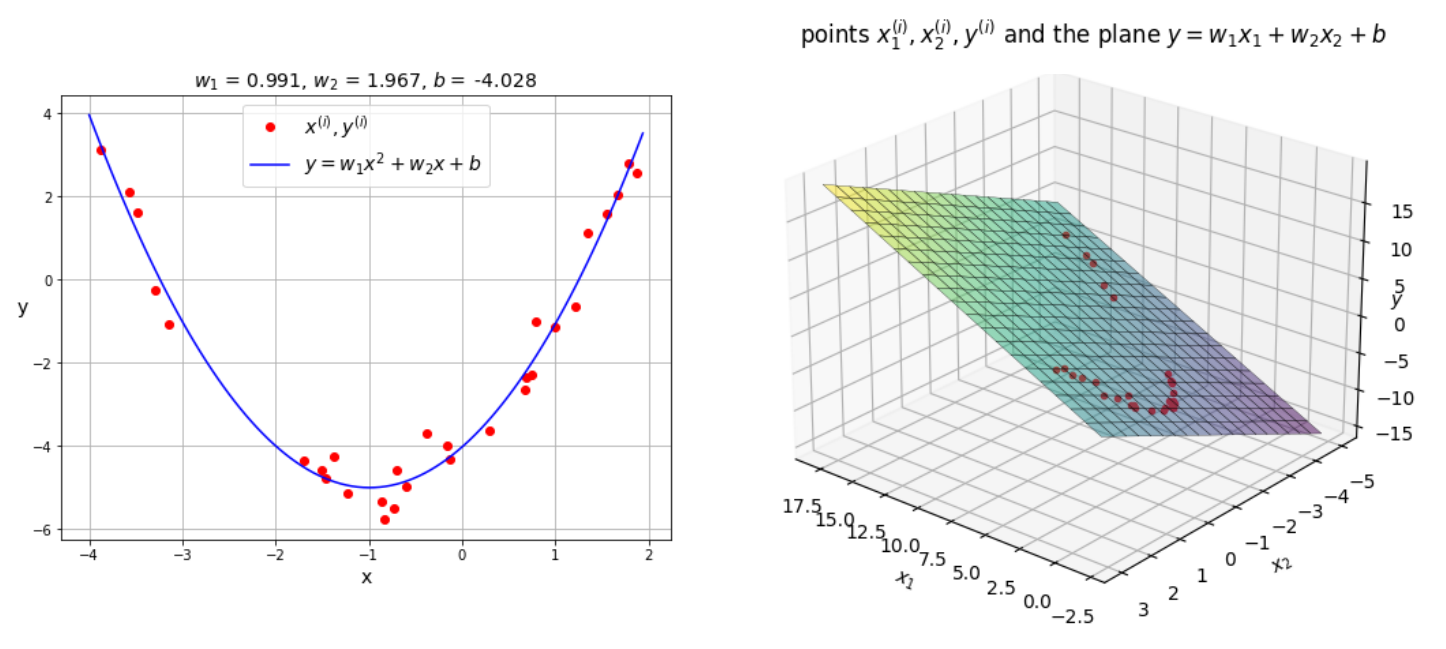

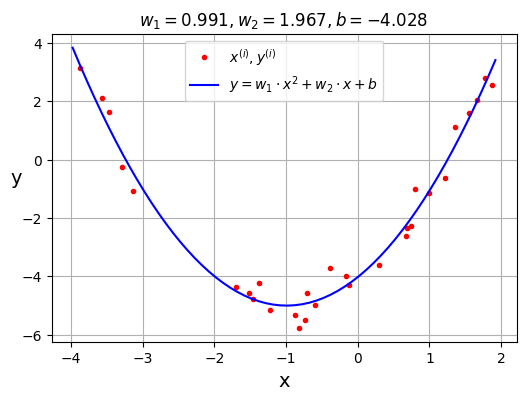

In [3]:
import math
# Set random seed for reproducibility
np.random.seed(0)

# Number of points
m = 30

# Quadratic equation parameters
A = 1
B = 2
C = -4

# Generate random x values
x0 = -B / (2 * A)  # Vertex of the parabola
L = 3
x = np.random.uniform(x0 - L, x0 + L, m)  # x values in range [x0-L, x0+L]

# Generate y values with some noise
error = np.random.normal(0, 0.4, m)  # Normally distributed noise
y = A * x**2 + B * x + C + error  # Quadratic function with noise

# Mean Squared Error function parameters
w1 = 0.991
w2 = 1.967
b = -4.028
# Define endpoints for the fitted curve
r = 0.1
xmin = np.min(x) - r
xmax = np.max(x) + r
xx = np.arange(xmin, xmax, 0.1)
yy = w1 * (xx**2) + w2 * xx + b

# Plot the points and the fitted quadratic curve
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'r.', label=rf'$x^{{(i)}}, y^{{(i)}}$')  # Scatter plot of noisy data
plt.plot(xx, yy, 'b', label=rf'$y = w_1 \cdot x^2 + w_2 \cdot x + b$')  # Quadratic fit

# Labels
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=0)

plt.title(rf'$w_1 = {w1:.3f}, w_2 = {w2:.3f}, b = {b:.3f}$', fontsize=12)

plt.grid()
plt.legend()
plt.show()


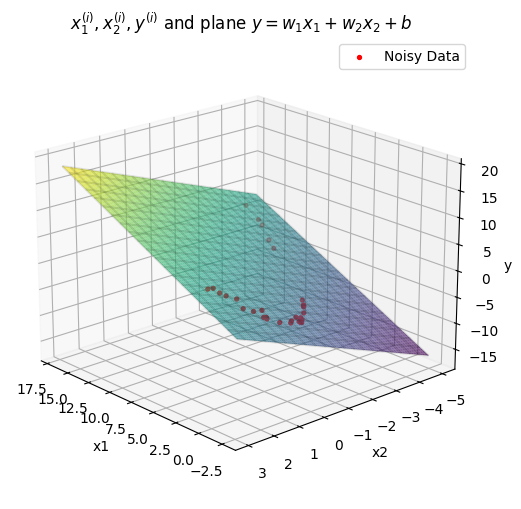

In [4]:
from mpl_toolkits import mplot3d
# Define grid for 3D plot
X1 = np.linspace(np.min(xx**2)-2.5, np.max(xx**2)+1, 100)
X2 = np.linspace(np.min(xx)-1, np.max(xx)+1, 100)

x1, x2 = np.meshgrid(X1, X2)  # Create grid

y_plain = w1 * x1 + w2 * x2 + b

# Create 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(x1, x2, y_plain, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.7)
# Wireframe grid
ax.plot_wireframe(x1, x2, y_plain, rstride=5, cstride=5, color='black', alpha=0.1)
# Add noisy data points
ax.scatter(x**2, x, y, color='r', label="Noisy Data",s=8)

# Viewing angle
ax.view_init(elev=20, azim=-222, roll=0)

ax.set_title(rf'$x_1^{{(i)}}, x_2^{{(i)}}, y^{{(i)}}$ and plane $y = w_1 x_1 + w_2 x_2 + b$')

# Viewing angle
ax.view_init(elev=20, azim=-222, roll=0,)
# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.text(0.95, 0.5, 'y', va='center')

ax.legend()
# Show plot
plt.show()

## **Exercise 3:**



Find the coefficients (kertoimet in Finnish) $w_1,w_2,b$ in exercise 2
by minimizing the cost

$$
C=\frac{1}{m}\,\sum_{i=1}^m \left(w_1x^{(i)}_1+w_2x^{(i)}_2+b-y^{(i)}\right)^2
$$


using the gradient descent and draw pictures like below (päivityskierros = update in Finnish)


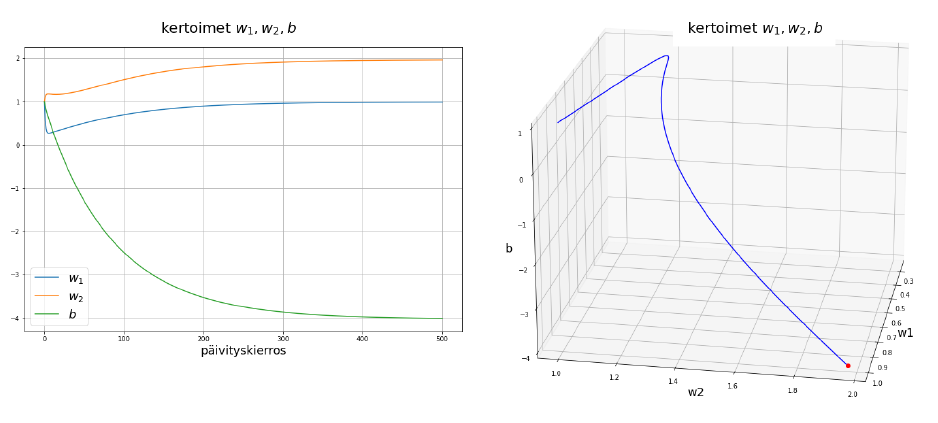

In [7]:
#gradient descent
#learning rate
alfa=0.01
#number of updates
N=500
#initial values
w1=1
w2=1
b=1

#collect the values of w,b and C
#to the vectors W,B,Cost
W1=np.zeros(N+1)
W2=np.zeros(N+1)
B=np.zeros(N+1)
Cost=np.zeros(N+1)
W1[0]=w1
W2[0]=w2
B[0]=b
#Cost function
Cost[0]=1/m*np.sum((w1 * (x**2) + w2 * x + b)**2)

for n in range(N): #n=0,1,2,...,N-1
    #partial derivatives
    dCw1 = (2/m) * np.sum((w1 * (x**2) + w2 * x + b - y) * (x**2))
    dCw2 = (2/m) * np.sum((w1 * (x**2) + w2 * x + b - y) * x)
    dCb = (2/m) * np.sum(w1 * (x**2) + w2 * x + b - y)

    #update
    w1=w1-alfa*dCw1
    w2=w2-alfa*dCw2
    b=b-alfa*dCb
    #collect
    W1[n+1]=w1
    W2[n+1]=w2
    B[n+1]=b
    Cost[n+1]=1/m*np.sum((w1 * (x**2) + w2 * x + b)**2)

In [8]:
print(w1)
print(b)

0.9872851738355946
-4.010642128607478


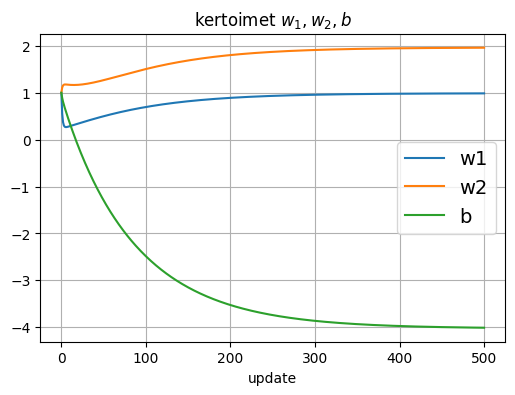

In [9]:
#graphs of the coefficients
plt.figure(figsize=(6,4))
plt.plot(W1,label='w1')
plt.plot(W2,label='w2')
plt.plot(B,label='b')
plt.title(rf'kertoimet $w_1 , w_2, b$')
plt.legend(fontsize=14)
plt.xlabel('update')
plt.grid()
plt.show()

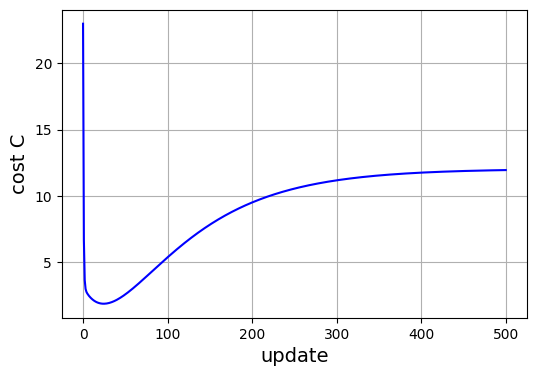

In [10]:
#graph of the cost
plt.figure(figsize=(6,4))
plt.plot(Cost,'b')
plt.xlabel('update',fontsize=14)
plt.ylabel('cost C',fontsize=14)
plt.grid()
plt.show()

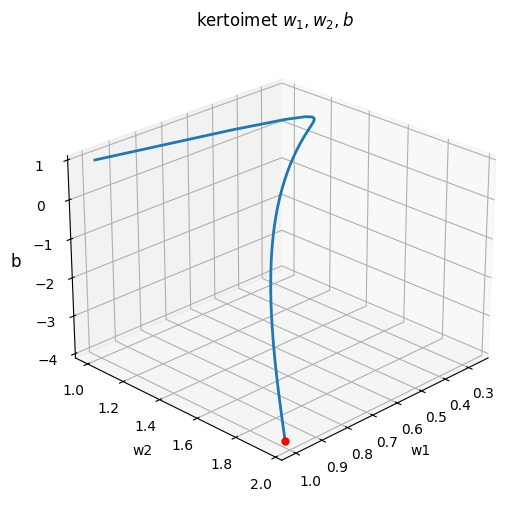

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('w1')
ax.set_ylabel('w2')

ax.plot3D(W1,W2,B,Cost,'b',linewidth=2) #Cost func
ax.plot3D(w1, w2, b, 'ro', markersize=5)  # Increase marker size to 10

# Add text slightly outside the plot to the top
fig.text(0.07, 0.5, 'b', va='center', fontsize=12)  # Label 'b' placed above the plot

# Set the plot title
ax.set_title(r'kertoimet $w_1 , w_2, b$')

# Adjust view angle
ax.view_init(elev=25, azim=45, roll=0)

# Show plot
plt.show()

##**Exercise 4**

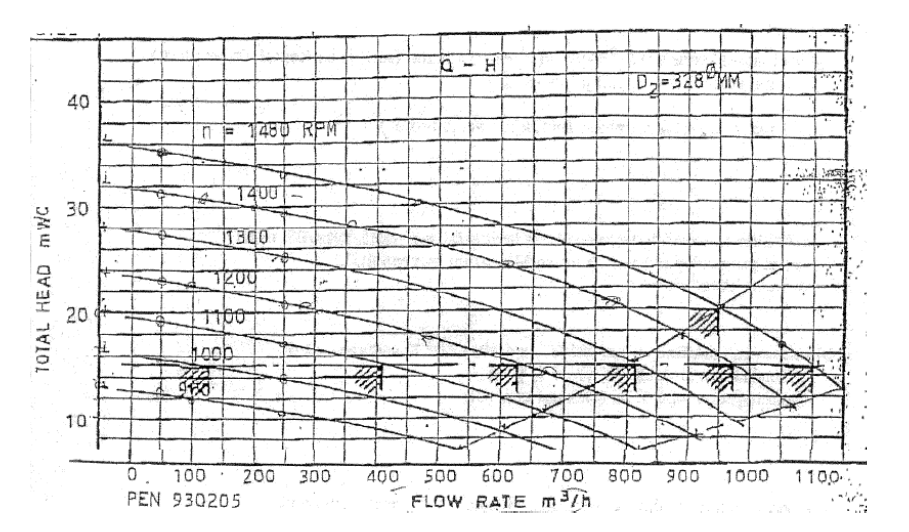

Load data_ex4.txt to Colab

In [2]:
#read data into a matrix data
data=np.loadtxt('data_ex4.txt',delimiter=',')
#rows [x1^(i),x2^(i),y^(i)] = [RPM/1000,FLOW RATE/1000,TOTAL HEAD] (taken from the picture above)
data[:5,:]

array([[ 1.48,  0.  , 36.1 ],
       [ 1.48,  0.05, 35.6 ],
       [ 1.48,  0.1 , 35.2 ],
       [ 1.48,  0.15, 34.6 ],
       [ 1.48,  0.2 , 34.4 ]])

Use the points $x_1^{(i)},x_2^{(i)},y^{(i)}$ to find a formula

$$
y=w_1x_1^2+w_2x_2^2+w_3x_1+w_4x_2+b
$$


using linear regression for the datapoints

$$
[(x_1^{(i)})^2,(x_2^{(i)})^2,x_1^{(i)},x_2^{(i)}],\quad y^{(i)}
$$

and draw pictures like below:

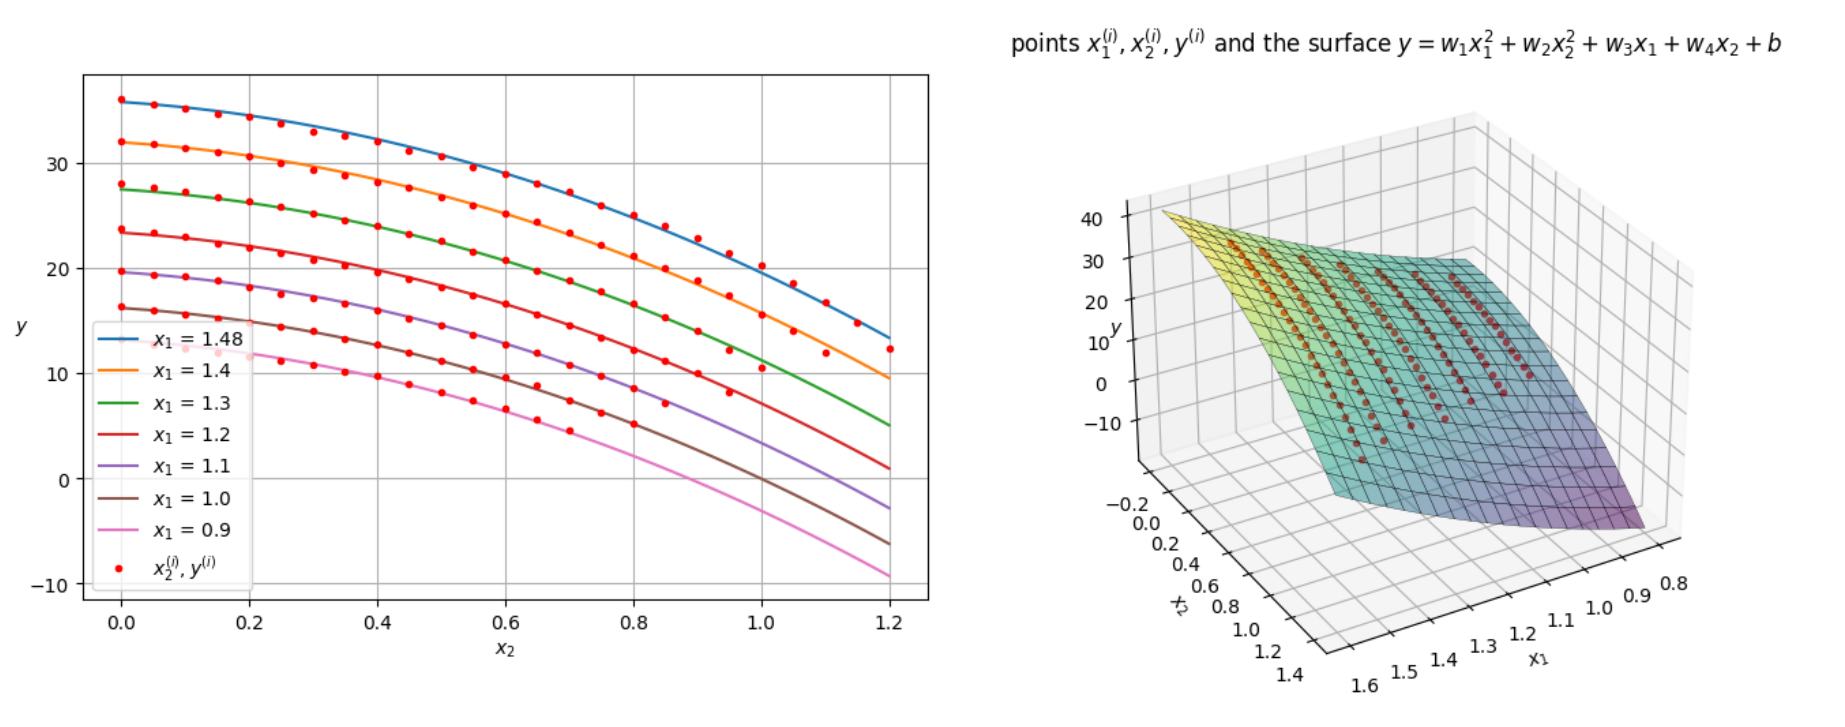

ans: $w_1=17.837,w_2=-12.299,w_3=-3.443,w_4=-3.924,b=1.803$

In [4]:
x1_og = data.T[0]
x2_og = data.T[1]
y_og = data.T[2]
X_og = np.array([x1_og**2,x2_og**2,x1_og, x2_og]).T
#print(X)
#print(x2)

In [5]:
#find coefficient and b
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_og,y_og)
w=model.coef_
b=model.intercept_

np.set_printoptions(precision=3,linewidth=300,suppress=True)
#suppress=True-> doesn't show e-forms of decimals i.e 5.0e-4 etc
print(w)
print(b)

w1 = w[0]
w2 = w[1]
w3 = w[2]
w4 = w[3]

[ 17.837 -12.299  -3.443  -3.924]
1.8033396755807551


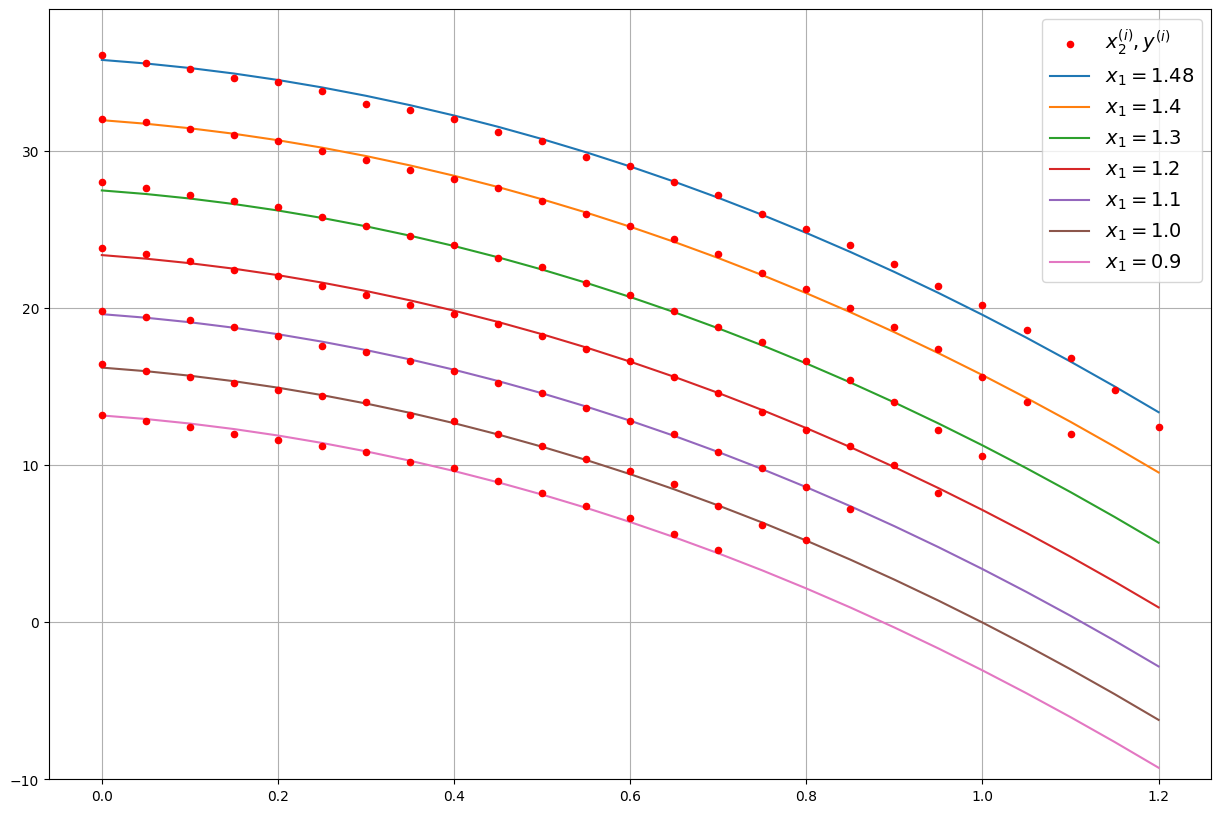

In [7]:
# Find unique elements in x1 and x2 in reverse order
unique_x1 = -np.unique(-x1_og)
unique_x2 = -np.unique(-x2_og)


# Graph of the coefficients
plt.figure(figsize=(15, 10))
plt.ylim(-10, 39)

# Plot the individual data points with red color and larger marker size
plt.scatter(x2_og, y_og, color='r', label='$x_2^{{(i)}} , y^{{(i)}}$', zorder=5, s=20)  # Change markersize to s

# Loop over the unique elements of x1
for i in range(len(unique_x1)):  # Loop from 0 to the length of unique_x1
    # Calculate the function values for the curve based on x2
    y_func = w1 * unique_x1[i]**2 + w2 * unique_x2**2 + w3 * unique_x1[i] + w4 * unique_x2 + b
    plt.plot(unique_x2, y_func, label=f'$x_1 = {unique_x1[i]}$')  # Use f-string for formatting

# Add a legend
plt.legend(fontsize=14)

# Add grid
plt.grid()

# Show plot
plt.show()

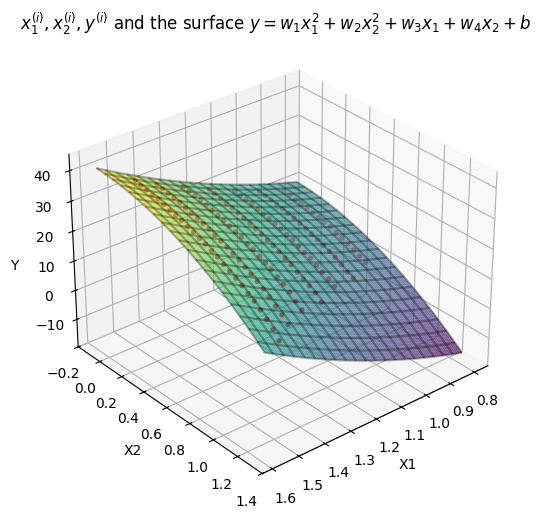

In [11]:
# Create a finer resolution by interpolating between unique_x1 and unique_x2 values
x1_fine = np.linspace(min(unique_x1)-0.1, max(unique_x1)+0.1, 100)  # Increase the number of points
x2_fine = np.linspace(min(unique_x2)-0.1, max(unique_x2)+0.1, 100)  # Increase the number of points

# Create a meshgrid using the finer resolution
x1, x2 = np.meshgrid(x1_fine, x2_fine)

# Calculate the output y using the given formula
y_plain = w1 * x1**2 + w2 * x2**2 + w3 * x1 + w4 * x2 + b

# Create 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(x1, x2, y_plain, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.7)

# Wireframe grid
ax.plot_wireframe(x1, x2, y_plain, rstride=5, cstride=5, color='black', alpha=0.3)

# Add noisy data points
ax.scatter(x1_og, x2_og, y_og, color='r', label="Noisy Data",s=8)

# Viewing angle
ax.view_init(elev=30, azim=50, roll=0)

# Set title and labels
ax.set_title(rf'$x_1^{{(i)}}, x_2^{{(i)}}, y^{{(i)}}$ and the surface $y = w_1 x_1^{{2}} + w_2 x_2^{{2}} + w_3 x_1 + w_4 x_2 + b$')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
fig.text(0.07, 0.5, 'Y', va='center')

# Show plot
plt.show()